<a href="https://colab.research.google.com/github/Md-Aziz-Developer/tensorflow-learning/blob/main/01_neural_network_regression_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable bases on some other combination of variables, even shorter... predictiing a number.


In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.17.1


## Creating data to view and fit

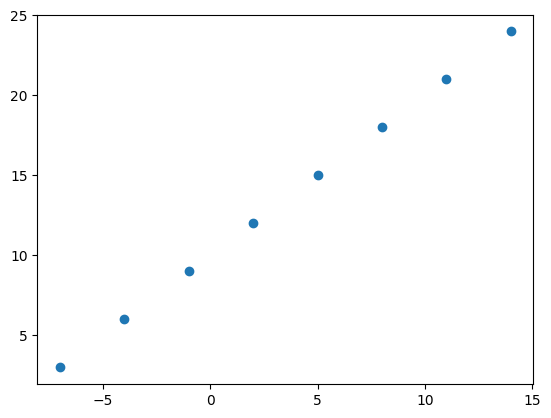

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X=np.array([-7.0, -4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create labels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualize it
plt.scatter(X,y);

In [3]:
y==X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shape

In [4]:
# Create a demo tensor for our housing price prediction problem
housing_info=tf.constant(['bedroom','bathroom','garage'])
housing_price=tf.constant([939700])
housing_info, housing_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0],y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape=X.shape
output_shape=y.shape
input_shape, output_shape

((8,), (8,))

In [8]:
X[0].shape, y[0].shape

((), ())

In [9]:
X[0].ndim

0

In [10]:
X[0], y[0]

(-7.0, 3.0)

In [11]:
# Turn our NUmPy arrays into tensors
X=tf.cast(tf.constant(X),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

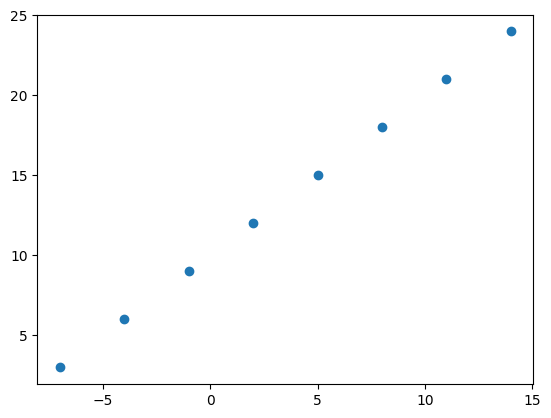

In [13]:
plt.scatter(X,y)

## Steps in modeling with tensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in pther words, the function which tells our model how erong it is) and the optimizer (tell our model how to improve the patterns its learning) an evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [14]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short form of stochasitc gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1), y, epochs=20)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 11.1924 - mae: 11.1924
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 11.0599 - mae: 11.0599
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 10.9274 - mae: 10.9274
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 10.7949 - mae: 10.7949
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 10.6624 - mae: 10.6624
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 10.5299 - mae: 10.5299
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 10.3974 - mae: 10.3974
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 10.2649 - mae: 10.2649
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 10.1324 - mae: 10.1324
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - loss: 9.9999 - mae: 9.9999
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 9.8674 - mae: 9.8674
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 9.7349 - mae: 9.7349
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1

In [15]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# Try and make a prediction using our model
y_preds=model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


In [17]:
y_preds

array([[23.30818]], dtype=float32)

## Improving the model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of  the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it traning for longer) or on more data (give the model example to learn from).

In [18]:
# Let's rebuild our model

# 1. Create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X,axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step - loss: 9.4052 - mae: 9.4052
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - loss: 9.2727 - mae: 9.2727
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 9.1402 - mae: 9.1402
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 9.0077 - mae: 9.0077
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - loss: 8.8752 - mae: 8.8752
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 8.7427 - mae: 8.7427
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - loss: 8.6102 - mae: 8.6102
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - loss: 8.4777 - mae: 8.4777
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 8.3452 - mae: 8.3452
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - loss: 8.2127 - mae: 8.2127
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 8.0802 - mae: 8.0802
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 7.9477 - mae: 7.9477
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

In [19]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [20]:
# Let's see if our model's prediction has improved
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[30.198967]], dtype=float32)

In [21]:
# Let's rebuild our model again (this time we added an extra hidden layer with 100 hidden units)

# 1. Create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Complie the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step - loss: 13.7781 - mae: 13.7781
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 13.2637 - mae: 13.2637
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 12.7519 - mae: 12.7519
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 12.2366 - mae: 12.2366
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.7115 - mae: 11.7115
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.1700 - mae: 11.1700
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 10.6093 - mae: 10.6093
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 10.0244 - mae: 10.0244
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9.4101 - mae: 9.4101
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.7696 - mae: 8.7696
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.1009 - mae: 8.1009
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 7.3896 - mae: 7.3896
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━

In [22]:
# Let's see if our model's prediction has improved after adding hidden layer
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[31.815279]], dtype=float32)

In [23]:
# Let's rebuild our model again

# 1. Create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None), # Decrease the hidden layer unit to 50 and activation to default
    tf.keras.layers.Dense(1)
])

# 2. Complie the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step - loss: 13.0035 - mae: 13.0035
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 12.5283 - mae: 12.5283
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 12.0493 - mae: 12.0493
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 11.5640 - mae: 11.5640
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 11.0698 - mae: 11.0698
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 10.5643 - mae: 10.5643
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 10.0447 - mae: 10.0447
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9.5086 - mae: 9.5086
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 8.9530 - mae: 8.9530
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 8.3752 - mae: 8.3752
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 7.7723 - mae: 7.7723
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 7.2193 - mae: 7.2193
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━

In [24]:
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[30.154453]], dtype=float32)

In [25]:
# Let's rebuild our model again

# 1. Create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Complie the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(), # change the optimizer to Adam
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 833ms/step - loss: 12.7309 - mae: 12.7309
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 12.6631 - mae: 12.6631
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 12.5952 - mae: 12.5952
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 12.5272 - mae: 12.5272
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 12.4592 - mae: 12.4592
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 12.3912 - mae: 12.3912
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 12.3230 - mae: 12.3230
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 12.2548 - mae: 12.2548
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 12.1864 - mae: 12.1864
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 12.1180 - mae: 12.1180
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 12.0495 - mae: 12.0495
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 11.9810 - mae: 11.9810
Epoch 13/100
1/1 ━━━━━━━

In [26]:
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[31.598076]], dtype=float32)

In [27]:
# Let's rebuild our model again

# 1. Create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Complie the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # Add learning rate to 0.01
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 830ms/step - loss: 11.7199 - mae: 11.7199
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 10.9869 - mae: 10.9869
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 10.2472 - mae: 10.2472
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9.4999 - mae: 9.4999
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 8.7433 - mae: 8.7433
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 7.9738 - mae: 7.9738
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.1871 - mae: 7.1871
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 6.9253 - mae: 6.9253
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 7.2856 - mae: 7.2856
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 7.5579 - mae: 7.5579
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 7.8537 - mae: 7.8537
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 7.8801 - mae: 7.8801
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5

In [28]:
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


array([[26.902962]], dtype=float32)

In [29]:
model.predict(np.array([21.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[30.837824]], dtype=float32)

## Evaluating a model

In Practice, a typical workflow you'll go through when building neural networks is :

...

Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...

...

when it comes to evaluation... there a re 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:

* The data-what data are we working with? what does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth(the original labels)?

In [30]:
# Make a bigger dataset
X= tf.range(-100, 100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [31]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

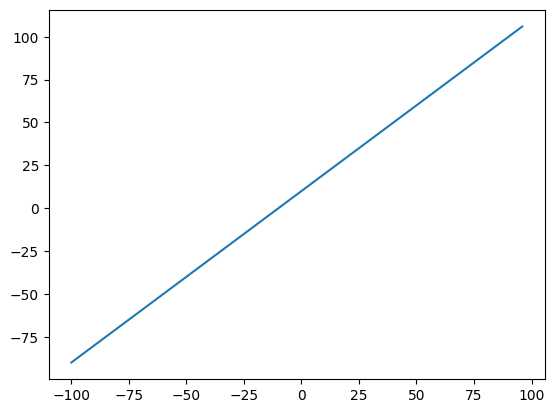

In [32]:
# Visualize the data
plt.plot(X,y)

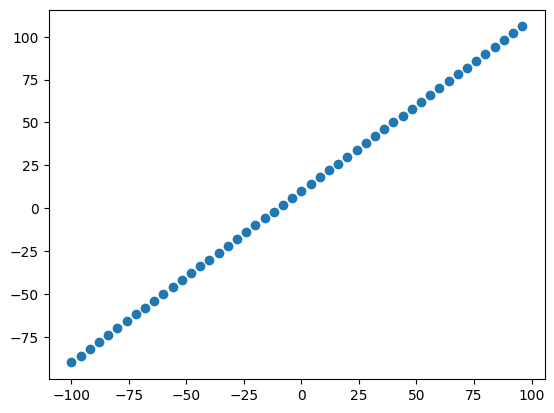

In [33]:
plt.scatter(X,y)

### The 3 sets...

* **Traning set** - the model learns from this data, whihc is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what is model has learned, this set is typically 10-15% of the total data available.

In [34]:
# Check the length of how many samples we have
len(X)

50

In [35]:
# Split the data into train and test sets
X_train=X[:40] # first 40 are training samples (80% of the data)
y_train=y[:40]

X_test=X[40:] # last 10 are testing samples (20% of the data)
y_test=y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualize the data
Now we've got our data in training and test sets.. let's visualize it again!

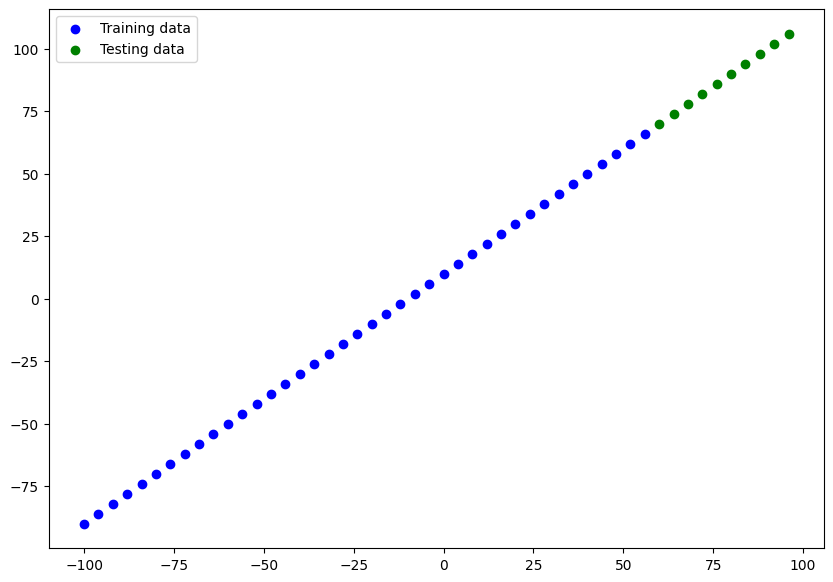

In [36]:
plt.figure(figsize=(10,7))
# Plot traning data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data ub green
plt.scatter(X_test, y_test,c="g", label="Testing data")
# Show a legend
plt.legend();

In [37]:
# Let's have a look how to build a neural network for our data

# 1. Create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
# model.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs=100)

In [38]:
# Visualizing the model
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [39]:
# Let's create a model which builds automatically by defining the input_shape arguments
tf.random.set_seed(42)

# 1. Create a model (same as above)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1),y, epochs=100)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't update during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

**Resources:** For more in-depth overview of the trainable parameters within the layer, check out MIT's introduction to deep learning video. https://www.youtube.com/watch?v=ErnWZxJovaM&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=2

**Exercise:** Try playing with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`.

In [41]:
# Let's fit our model to the traning data
model.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs=100,verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 15.6783 - mae: 15.6783 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.9171 - mae: 9.9171 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.2609 - mae: 8.2609 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.9326 - mae: 8.9326 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.9774 - mae: 7.9774 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.6136 - mae: 9.6136 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.9596 - mae: 7.9596 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.6020 - mae: 9.6020 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.9417 - mae: 7.9417 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.5904 - mae: 9.5904 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.9239 - mae: 7.9239 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.5788 - mae: 9.5788
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/s

In [42]:
# Get a summary of our model
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

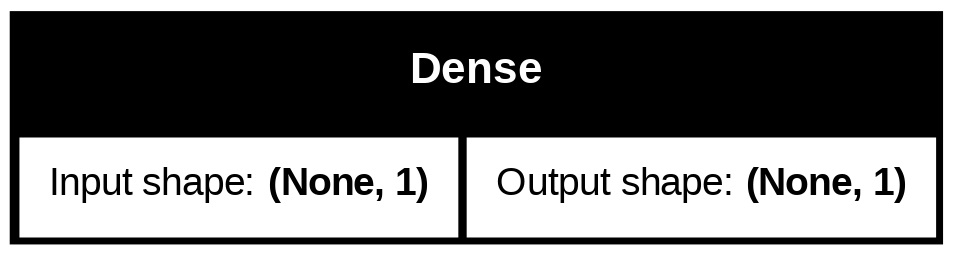

In [43]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

In [44]:
# Let's create a model which builds automatically by defining the input_shape arguments
tf.random.set_seed(42)

# 1. Create a model (same as above)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
],name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [45]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Fit the model
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 36.0207 - mae: 36.0207 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27.4481 - mae: 27.4481 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24.1397 - mae: 24.1397 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.8522 - mae: 19.8522 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.6913 - mae: 17.6913 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.7448 - mae: 16.7448 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.4397 - mae: 16.4397 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.0600 - mae: 12.0600 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14.9823 - mae: 14.9823 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 15.9126 - mae: 15.9126 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12.0461 - mae: 12.0461 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.0692 - mae: 15.0692 
Epoch 13/100
2/2 ━━━━━━━

In [47]:
# Get a summary of our model
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303 (1.19 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

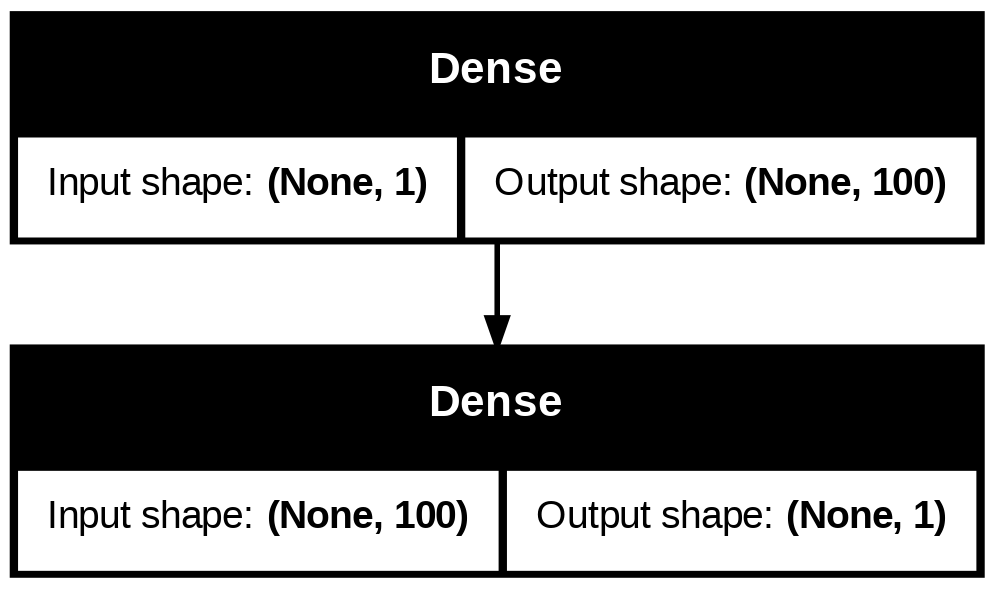

In [48]:
plot_model(model=model,show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the groud truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model predictions).

In [49]:
# Make some predictions
y_pred=model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[41.743004],
       [44.41708 ],
       [47.09116 ],
       [49.76524 ],
       [52.439312],
       [55.1134  ],
       [57.787468],
       [60.461555],
       [63.13563 ],
       [65.80971 ]], dtype=float32)

In [50]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note:** If you feel like you're going to reuse some kind of funtinality in the future, it's a good idea to turn it into a function.

In [51]:
# Let's create plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots traning data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data,train_labels,c="b",label="Training data")
  # Plot testing data in green
  plt.scatter(test_data,test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data,predictions, c="r",label="Predictions")
  # Show the legend
  plt.legend();

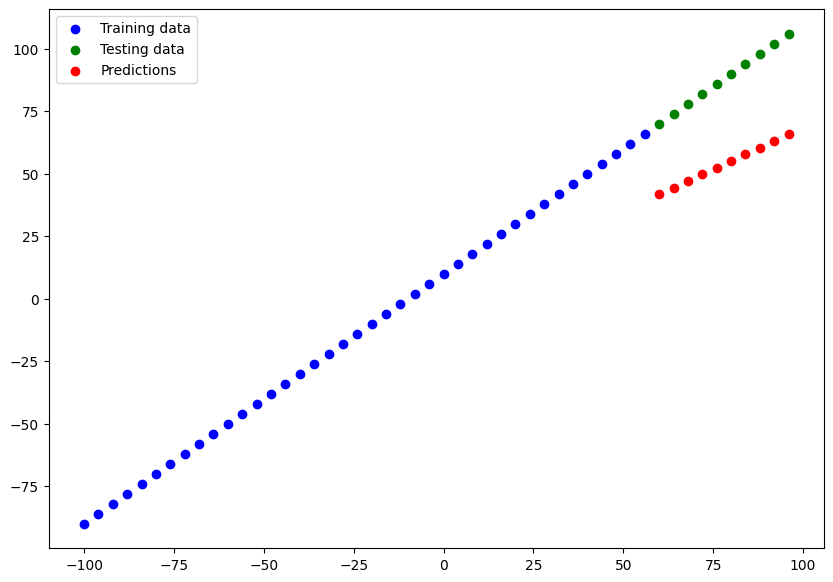

In [52]:
plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred)

In [53]:
# Let's refine our model by tunning the hyperparameters

# Create another model
new_model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# Compile the model
new_model.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=(0.01)),
                  metrics=["mae"]
                  )


In [54]:
# Get the model summary
new_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
# Fit the model
new_model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 35.2585 - mae: 35.2585
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.6717 - mae: 14.6717 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12.4683 - mae: 12.4683
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 16.8104 - mae: 16.8104 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 14.4482 - mae: 14.4482
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.0672 - mae: 10.0672 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.6258 - mae: 8.6258 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.5618 - mae: 11.5618 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.5801 - mae: 9.5801 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.8659 - mae: 6.8659 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.6243 - mae: 8.6243  
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.4383 - mae: 8.4383 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━

In [56]:
# Get the predictions of our model
y_pred=new_model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[ 68.315895],
       [ 72.21152 ],
       [ 76.10715 ],
       [ 80.00278 ],
       [ 83.8984  ],
       [ 87.79404 ],
       [ 91.68967 ],
       [ 95.58528 ],
       [ 99.48092 ],
       [103.37654 ]], dtype=float32)

In [57]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

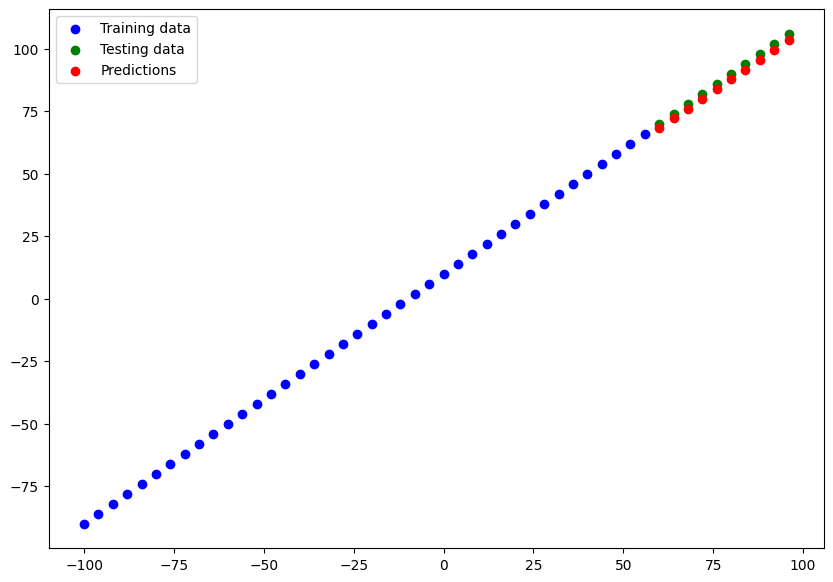

In [58]:
# Visualize the predictions again
plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred)

In [59]:
## Almost predictions match with our true value let's tune more by adding more hidden layer and change learning rate by 0.02 and epochs to 150

# Create another model
new_model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=[1]),
    tf.keras.layers.Dense(100), # Added extra 100 unit hidden layer
    tf.keras.layers.Dense(1)
])

# Compile the model
new_model.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=(0.02)),
                  metrics=["mae"]
                  )

In [60]:
new_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,401 (40.63 KB)

 Trainable params: 10,401 (40.63 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
new_model.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs=150, verbose=1)

Epoch 1/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 54.8732 - mae: 54.8732
Epoch 2/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 67.6696 - mae: 67.6696 
Epoch 3/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 33.1351 - mae: 33.1351 
Epoch 4/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 35.6805 - mae: 35.6805 
Epoch 5/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.4127 - mae: 10.4127
Epoch 6/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.5301 - mae: 23.5301 
Epoch 7/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.0531 - mae: 10.0531
Epoch 8/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 19.0561 - mae: 19.0561 
Epoch 9/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15.1182 - mae: 15.1182 
Epoch 10/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.9516 - mae: 9.9516 
Epoch 11/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 14.9667 - mae: 14.9667
Epoch 12/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.7991 - mae: 4.7991 
Epoch 13/150
2/2 ━━━━━━━━━━━━━━━

In [62]:
y_pred=new_model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[65.71755],
       [69.4536 ],
       [73.18966],
       [76.9257 ],
       [80.66174],
       [84.3978 ],
       [88.13385],
       [91.8699 ],
       [95.60596],
       [99.342  ]], dtype=float32)

In [63]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

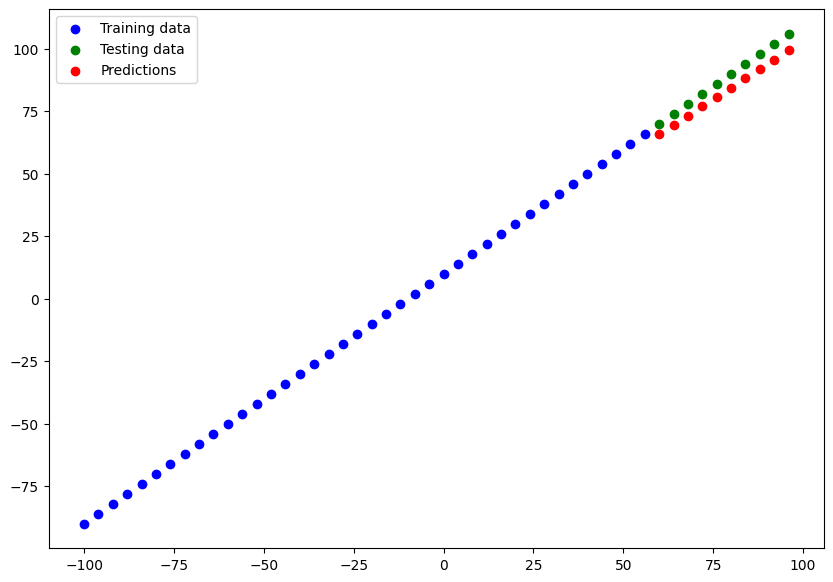

In [64]:
# Visualize the predictions again
plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred)

In [65]:
## After more tunning the prediction not improving instead of it get worse then previous one so let's stick on previous one

# Create another model
new_model2=tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# Compile the model
new_model2.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=(0.01)),
                  metrics=["mae"]
                  )

# Fit the model
new_model2.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 38.1949 - mae: 38.1949  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.0532 - mae: 18.0532 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.0180 - mae: 11.0180 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.4934 - mae: 16.4934 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 16.0582 - mae: 16.0582
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12.1407 - mae: 12.1407 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.0946 - mae: 8.0946 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.8898 - mae: 9.8898 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.8467 - mae: 10.8467 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.2717 - mae: 8.2717 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.0815 - mae: 7.0815 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.9274 - mae: 7.9274 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━

In [66]:
y_pred=new_model2.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([[ 68.50853 ],
       [ 72.401665],
       [ 76.2948  ],
       [ 80.18794 ],
       [ 84.081085],
       [ 87.974205],
       [ 91.867355],
       [ 95.7605  ],
       [ 99.65364 ],
       [103.54677 ]], dtype=float32)

In [67]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

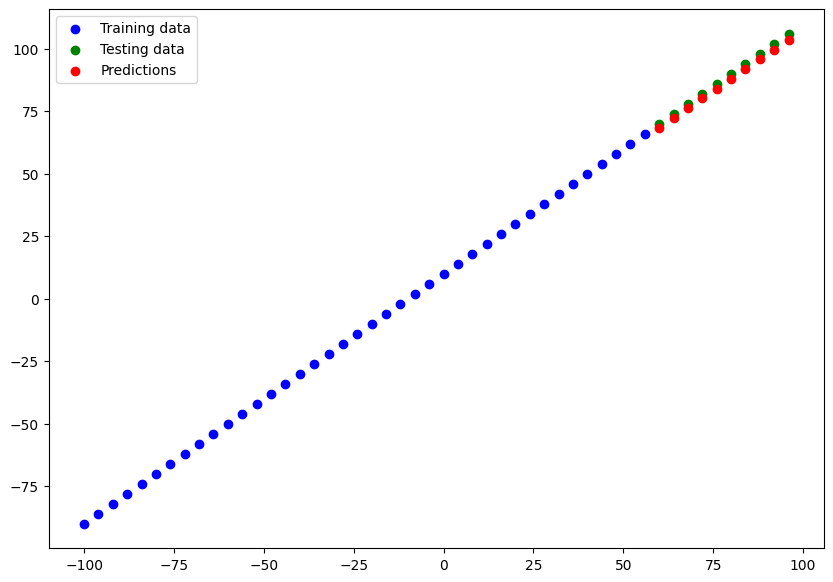

In [68]:
# Visualize the predictions again
plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be diffreenr evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [69]:
# Evaluate the model on the test set
new_model2.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - loss: 1.9724 - mae: 1.9724


[1.97235107421875, 1.97235107421875]

In [70]:
y_pred

array([[ 68.50853 ],
       [ 72.401665],
       [ 76.2948  ],
       [ 80.18794 ],
       [ 84.081085],
       [ 87.974205],
       [ 91.867355],
       [ 95.7605  ],
       [ 99.65364 ],
       [103.54677 ]], dtype=float32)